In [1]:
# First we will import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
# Loading the dataset
leads_df = pd.read_csv(r"C:\Users\stark\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [3]:
# Info about the dataset
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads_df.shape

(9240, 37)

In [7]:
# Here we will check for missing values
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# We do have missing values, now lets deal with them

In [9]:
# Replacing 'Select' with NaN
leads_df.replace('Select', np.nan, inplace=True)

# Checking missing values percentages
missing_values = leads_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(leads_df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Display missing values
missing_df

,Missing Values,Percentage
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879


In [10]:
# Lets drop columns with >40% missing values
drop_cols = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Score', 
             'Asymmetrique Activity Score', 'Asymmetrique Profile Index']
leads_df.drop(columns=drop_cols, inplace=True)

# Lets impute missing values for categorical variables
for column in leads_df.select_dtypes(include=['object']).columns:
    leads_df[column].fillna(leads_df[column].mode()[0], inplace=True)

# Lets impute missing values for numerical variables
for column in leads_df.select_dtypes(include=['int64', 'float64']).columns:
    leads_df[column].fillna(leads_df[column].median(), inplace=True)

In [11]:
leads_df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [12]:
# Now we have dealt with the missing values successfully.
# Now we will start EDA

Lead Conversion Rate: 38.54%


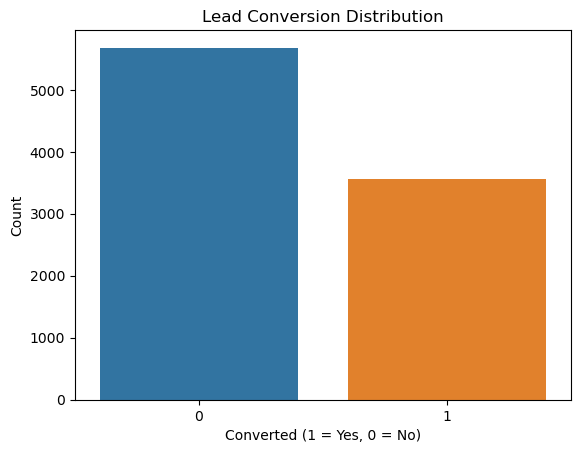

In [13]:
# Lets check the percentage of leads converted
conversion_rate = leads_df['Converted'].mean() * 100
print(f"Lead Conversion Rate: {conversion_rate:.2f}%")

# Plot conversion rate
sns.countplot(x=leads_df['Converted'])
plt.title("Lead Conversion Distribution")
plt.xlabel("Converted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

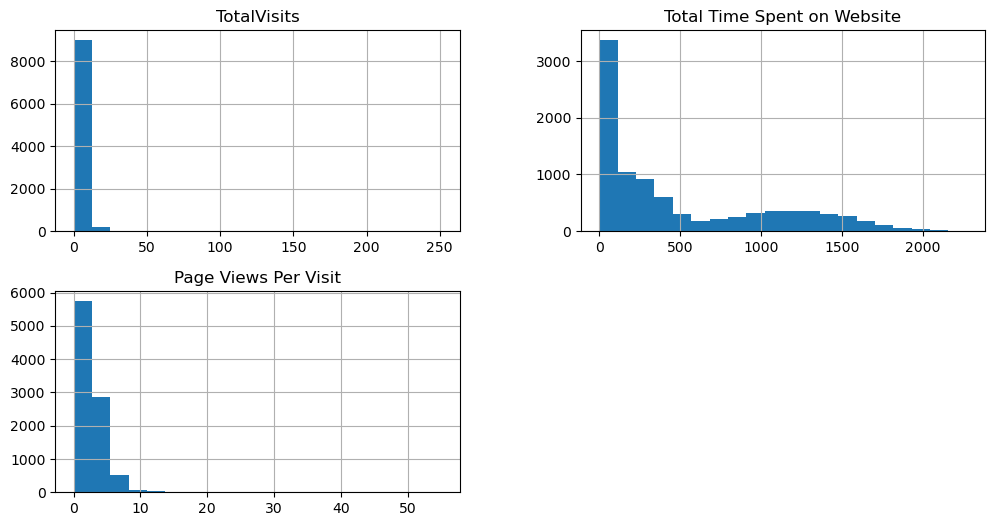

In [14]:
# Plotting histograms for numerical features
leads_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].hist(bins=20, figsize=(12, 6))
plt.show()

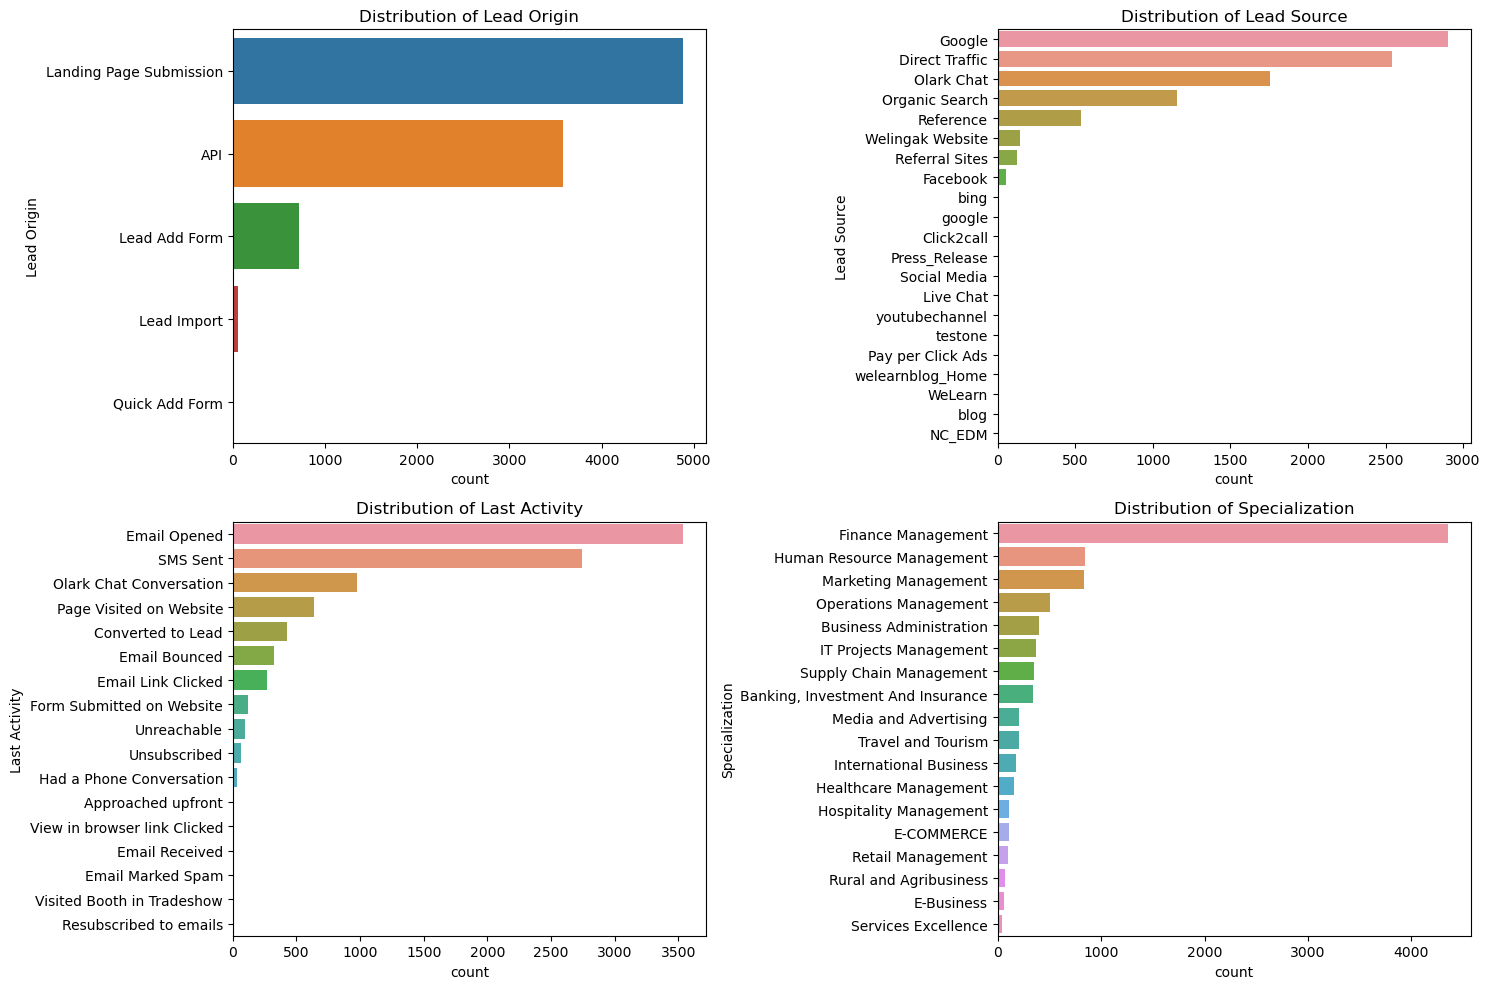

In [15]:
# Visualizing the categorical variables
categorical_features = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=leads_df[feature], order=leads_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [16]:
# Lets perform feature engineering
# One-hot encoding categorical variables
leads_df = pd.get_dummies(leads_df, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
leads_df[num_cols] = scaler.fit_transform(leads_df[num_cols])

In [17]:
# Lets drop some unnecessary columns
# Define the columns to drop
drop_features = ['Lead Number', 'Prospect ID', 'I agree to pay the amount through cheque']

# Filter out columns that are not in the dataframe
existing_features = [col for col in drop_features if col in leads_df.columns]

# Drop only the existing columns
leads_df.drop(columns=existing_features, inplace=True)

# Confirm which columns were dropped
print(f"Dropped Columns: {existing_features}")

X = leads_df.drop(columns=['Converted'])
y = leads_df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train, y_train)

# Get new predictions
y_train_pred_prob = logreg.predict_proba(X_train)[:, 1]
y_test_pred_prob = logreg.predict_proba(X_test)[:, 1]

Dropped Columns: ['Lead Number']


In [18]:
# Splitting data into training and test sets
X = leads_df.drop(columns=['Converted'])
y = leads_df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Checking the percentage of converted 1 and not converted 0 leads
print(leads_df['Converted'].value_counts(normalize=True) * 100)

0    61.461039
1    38.538961
Name: Converted, dtype: float64


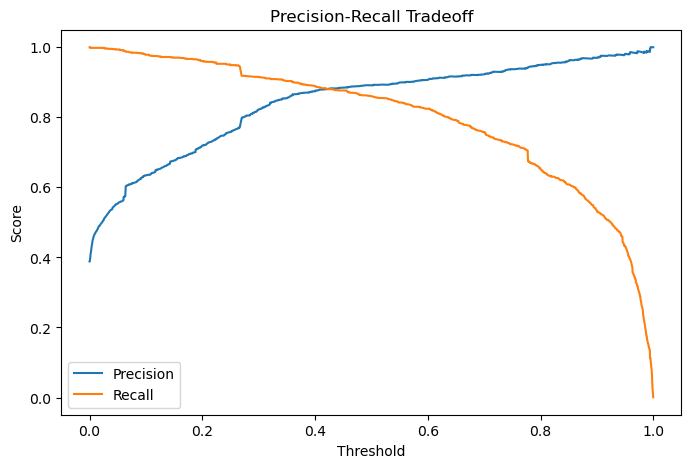

Optimal threshold: 0.42
Confusion Matrix:
 [[1566  129]
 [ 129  948]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1695
           1       0.88      0.88      0.88      1077

    accuracy                           0.91      2772
   macro avg       0.90      0.90      0.90      2772
weighted avg       0.91      0.91      0.91      2772

ROC-AUC Score: 0.96


In [20]:
# Making predictions
from sklearn.metrics import precision_recall_curve
y_train_pred_prob = logreg.predict_proba(X_train)[:, 1]
y_test_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Function to evaluate model
def evaluate_model(y_true, y_pred_prob, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).astype(int)
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\nClassification Report:\n', classification_report(y_true, y_pred))
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    print(f'ROC-AUC Score: {roc_auc:.2f}')
    return roc_auc

# Finding the Best Threshold Using Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)
threshold_df = pd.DataFrame({'Threshold': thresholds, 'Precision': precision[:-1], 'Recall': recall[:-1]})

# Plot Precision-Recall tradeoff
plt.figure(figsize=(8, 5))
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], label='Precision')
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.show()

# Finding the threshold where precision and recall are balanced
balanced_threshold = threshold_df.iloc[(threshold_df['Precision'] - threshold_df['Recall']).abs().argmin()]['Threshold']
print(f"Optimal threshold: {balanced_threshold:.2f}")

# Applying the optimal threshold
y_train_pred = (y_train_pred_prob >= balanced_threshold).astype(int)
y_test_pred = (y_test_pred_prob >= balanced_threshold).astype(int)

test_roc_auc = evaluate_model(y_test, y_test_pred_prob, balanced_threshold)

In [21]:
# Assigning lead scores based on predicted probabilities
test_leads = X_test.copy()  # Copy test data to keep structure
test_leads['Lead Score'] = (y_test_pred_prob * 100).astype(int)  # Assign lead score

# Creating final predictions dataframe
final_predictions = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Lead Score': test_leads['Lead Score']})

# Display first few rows
print("Final Predictions:")
final_predictions.head(10)

Final Predictions:


,Actual,Predicted,Lead Score
4608,1,1,83
7935,0,0,9
4043,0,0,3
7821,0,0,2
856,0,0,30
927,0,0,8
318,1,1,98
1018,0,0,10
8151,0,0,0
1570,1,1,97
